In [1]:
# slap from 2 to 20 atoms is perfect for doing this kind of exercise
from ase.visualize import view
from ase.build import fcc100
s = fcc100('Al', (5, 5, 5))
v = view(s, repeat=(1, 1, 1), viewer='ngl')
v.custom_colors({'Mn':'green','As':'blue'})
v.view._remote_call("setSize", target="Widget", args=["400px", "400px"])
v.view.center_view()
v.view.background='#ffc'
v.view.parameters=dict(clipDist=-400)

v.view.add_ball_and_stick()
#v.view.add_axes()
v.view.add_distance([[0,2]])
v.view

NGLWidget(background='#ffc')

In [19]:
#i would say coordination number is 
# 1 bhind
# + 6 around, the coordination number is 7.


In [26]:
s.get_all_distances()[0][s.get_all_distances()[0] < 3]

array([0.        , 2.86378246, 2.86378246, 2.86378246])

In [28]:
s.get_all_distances()[20][s.get_all_distances()[20] < 3]

array([2.86378246, 0.        , 2.86378246, 2.86378246, 2.86378246])

In [29]:
s.get_all_distances()[100][s.get_all_distances()[100] < 3]

array([2.86378246, 0.        , 2.86378246, 2.86378246])

In [1]:
# import ase.io
# mode30 = ase.io.read('vib.30.traj', index=':')
# nglview.show_asetraj(mode30)

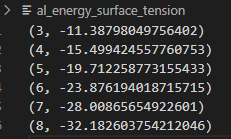

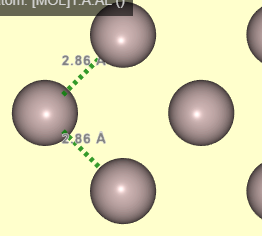

In [4]:
# we got this  and we can find the thing from.
N = [3,4,5,6,7,8]
E_N = [-11.39, -15.50, -19.71, -23.88, -28.01, -32.18]
A = 2.86**2
for i in [1,2,3,4,5]:
    s = (N[i]*E_N[i-1] - (N[i]-1)*E_N[i])/(2*A)*1000 # 1000 for convinence
    print(s)

# So we are what looks close

57.4600224949874
81.9110958971101
69.68555919604788
55.01491515477565
72.13066653625962


Work function: 4.47 eV


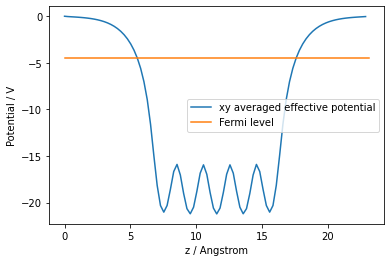

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from gpaw import GPAW

# Read in the 5-layer slab:
calc = GPAW('slab_5.gpw')
slab = calc.get_atoms()

# Get the height of the unit cell:
L = slab.get_cell()[2, 2]

# Get the effective potential on a 3D grid:
v = calc.get_effective_potential()

nx, ny, nz = v.shape
z = np.linspace(0, L, nz, endpoint=False)

efermi = calc.get_fermi_level()

# Calculate xy averaged potential:
vz = v.mean(axis=0).mean(axis=0)
print(f'Work function: {vz.max() - efermi:.2f} eV')

plt.plot(z, vz, label='xy averaged effective potential')
plt.plot([0, L], [efermi, efermi], label='Fermi level')
plt.ylabel('Potential / V')
plt.xlabel('z / Angstrom')
plt.legend(loc=0)
# plt.savefig('workfunction.png', format='png')
plt.show()
# it is because we have filled up to the fermi level, and the workfunctions is what gets us above that
